In [48]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

https://www.youtube.com/watch?v=FQgG9tPZ-I4&t=2111s
https://www.youtube.com/watch?v=cD41LXKSyVU&list=PLOr3fZwA0ZzIIXOFcY5t6Zk1PxhhzTrvX&index=10

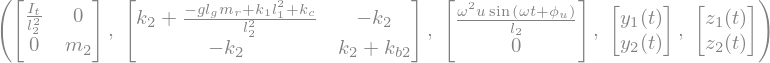

In [49]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

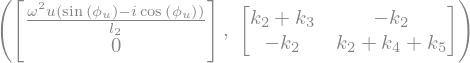

In [50]:
k2 = symbols('k_2', real=True)
k3, k4, k5 = symbols('k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_til = Matrix([l2**(-1)*u*w**2*(sin(phiu)-I*cos(phiu)), 0])
K_til = K + FFHM
f_til, K_til

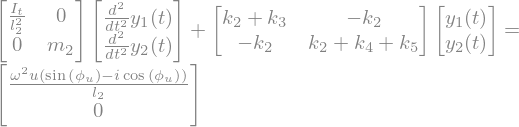

In [51]:
diff_eq = Eq(Add(MatMul(M,yt.diff(t,2)), MatMul(K_til,yt), evaluate=False), f_til)
diff_eq

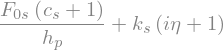

In [52]:
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
kk

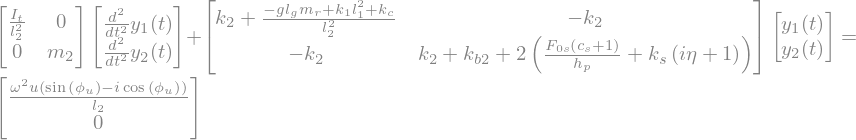

In [53]:
diff_eq.subs({k3: kk3, k4: kb2, k5: Mul(2,kk, evaluate=False)})

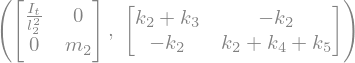

In [54]:
M, K_til

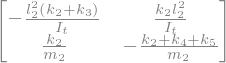

In [55]:
la = symbols('lambda')
A = - M.inv() * K_til
A

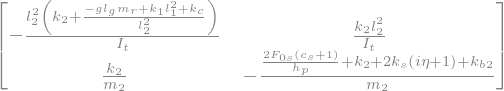

In [56]:
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A_func

# 4.2 Omskrives til komplekst

4.4

In [225]:
mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**(3),k2:1.61*10**(3),
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83*1000, eta:(33/100), Fs0:5.2}
v50 = {ks:0.995*1000, eta:(21/100), Fs0:8}
v70 = {ks:1.37*1000, eta:(10.5/100), Fs0:9.65}
v30, v50, v70

# Opgave 4.4

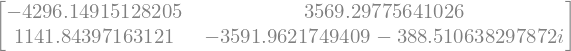

In [226]:
A_func.subs(mydict).subs(v30)

In [227]:
list(A_func.subs(mydict).subs(v30).eigenvals().keys())

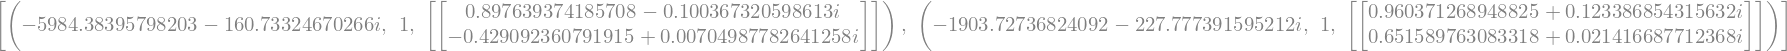

In [228]:
list(A_func.subs(mydict).subs(v30).eigenvects())

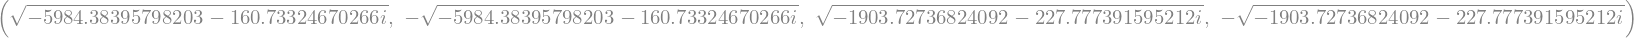

In [229]:
las = list(A_func.subs(mydict).subs(v30).eigenvals().keys())
sqrt(las[0]), -sqrt(las[0]), sqrt(las[1]), -sqrt(las[1])

# Opgave 4.5

In [230]:
la_sol30 = list(A_func.subs(mydict).subs(v30).eigenvals().keys())
la_sol50 = list(A_func.subs(mydict).subs(v50).eigenvals().keys())
la_sol70 = list(A_func.subs(mydict).subs(v70).eigenvals().keys())
la_sol30, la_sol50, la_sol70

4.5

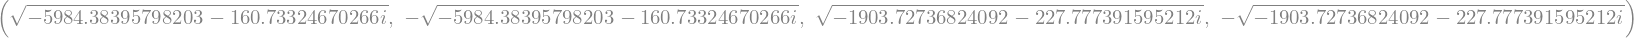

In [231]:
la11, la12, la21, la22 = sqrt(la_sol30[0]), -sqrt(la_sol30[0]), sqrt(la_sol30[1]), -sqrt(la_sol30[1])
la11, la12, la21, la22

In [232]:
xi11_30 = - re(la11)/abs(la11)
xi12_30 = - re(la12)/abs(la12)
xi21_30 = - re(la21)/abs(la21)
xi22_30 = - re(la22)/abs(la22)
xi11_30, xi12_30, xi21_30, xi22_30

In [233]:
wn11 = abs(sqrt(la11))
wn12 = abs(sqrt(la12))
wn21 = abs(sqrt(la21))
wn22 = abs(sqrt(la22))
wn11, wn12, wn21, wn22

In [234]:
wd12 = abs(im(sqrt(la12)))
wd22 = abs(im(sqrt(la22)))
wd12, wd22

# Opgave 4.7

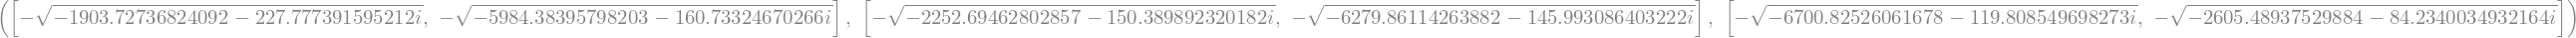

In [235]:
la30 = [-sqrt(la_sol30[1]), -sqrt(la_sol30[0])]
la50 = [-sqrt(la_sol50[1]), -sqrt(la_sol50[0])]
la70 = [-sqrt(la_sol70[1]), -sqrt(la_sol70[0])]
la30, la50, la70

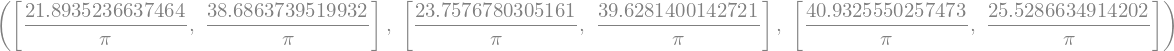

In [236]:
xi30 = [- re(la30[0])/abs(la30[0]), - re(la30[1])/abs(la30[1])]
xi50 = [- re(la50[0])/abs(la50[0]), - re(la50[1])/abs(la50[1])]
xi70 = [- re(la70[0])/abs(la70[0]), - re(la70[1])/abs(la70[1])]
wn30hz = [abs(la30[0])/(2*pi), abs(la30[1])/(2*pi)]
wn50hz = [abs(la50[0])/(2*pi), abs(la50[1])/(2*pi)]
wn70hz = [abs(la70[0])/(2*pi), abs(la70[1])/(2*pi)]
wn30hz, wn50hz, wn70hz 

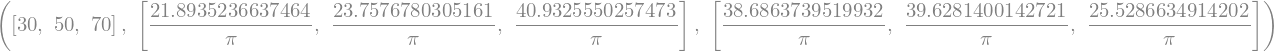

In [237]:
x = [30, 50, 70]
y = [wn30hz[0], wn50hz[0], wn70hz[0], wn30hz[1], wn50hz[1], wn70hz[1]]
x, y[:3], y[3:6]

In [238]:
x = [30, 50, 70]
y_xi = [xi30[0], xi50[0], xi70[0], xi30[1], xi50[1], xi70[1]]
x, y_xi[0:3], y_xi[3:6]

In [239]:
d301 = xi30[0] * wn30hz[0] * 2 * pi
d302 = xi30[1] * wn30hz[1] * 2 * pi
d501 = xi50[0] * wn50hz[0] * 2 * pi
d502 = xi50[1] * wn50hz[1] * 2 * pi
d701 = xi70[0] * wn70hz[0] * 2 * pi
d702 = xi70[1] * wn70hz[1] * 2 * pi
y_d = [d301, d501, d701, d302, d502, d702]
y_d[:3], y_d[3:6]

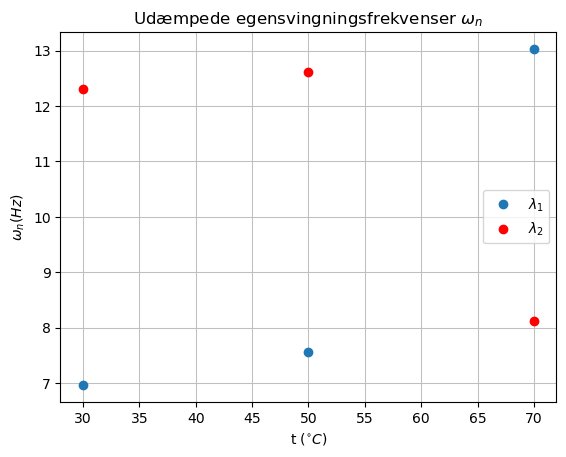

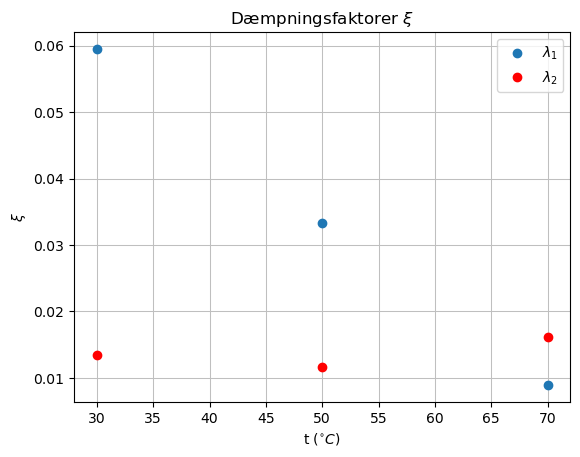

In [241]:
p1 = dtuplot.scatter(x, y[:3], ylabel='$\omega_n (Hz)$', xlabel='t $(^{\circ}C)$', title='Udæmpede egensvingningsfrekvenser $\omega_n$', show=False)
p2 = dtuplot.scatter(x, y[3:6], ylabel='$\omega_n (Hz)$', xlabel='t $(^{\circ}C)$', title='Udæmpede egensvingningsfrekvenser $\omega_n$', show=False, rendering_kw={'color':'red'})
comb = p1+p2
comb.ax.legend(['$\lambda_1$', '$\lambda_2$'], loc='center right')

p1 = dtuplot.scatter(x, y_xi[:3], ylabel='$\\xi$', xlabel='t $(^{\circ}C)$', title='Dæmpningsfaktorer $\\xi$', show=False)
p2 = dtuplot.scatter(x, y_xi[3:6], ylabel='$\\xi$', xlabel='t $(^{\circ}C)$', title='Dæmpningsfaktorer $\\xi$', show=False, rendering_kw={'color':'red'})
comb = p1+p2
comb.ax.legend(['$\lambda_1$', '$\lambda_2$'], loc='upper right')

# Opgave 4.8

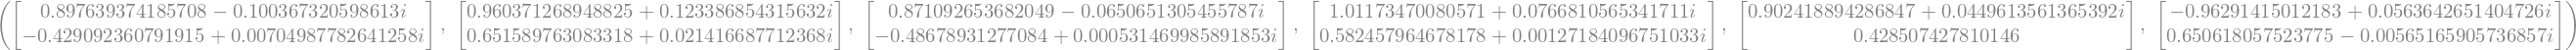

In [242]:
lavec1_sol30 = list(A_func.subs(mydict).subs(v30).eigenvects())[0][2][0]
lavec2_sol30 = list(A_func.subs(mydict).subs(v30).eigenvects())[1][2][0]
lavec1_sol50 = list(A_func.subs(mydict).subs(v50).eigenvects())[0][2][0]
lavec2_sol50 = list(A_func.subs(mydict).subs(v50).eigenvects())[1][2][0]
lavec1_sol70 = list(A_func.subs(mydict).subs(v70).eigenvects())[0][2][0]
lavec2_sol70 = list(A_func.subs(mydict).subs(v70).eigenvects())[1][2][0]
lavec1_sol30, lavec2_sol30, lavec1_sol50, lavec2_sol50, lavec1_sol70, lavec2_sol70

In [243]:
A301, A302 = re(lavec1_sol30[0]/lavec1_sol30[1]), re(lavec2_sol30[0]/lavec2_sol30[1])
A501, A502 = re(lavec1_sol50[0]/lavec1_sol50[1]), re(lavec2_sol50[0]/lavec2_sol50[1])
A701, A702 = re(lavec1_sol70[0]/lavec1_sol70[1]), re(lavec2_sol70[0]/lavec2_sol70[1])
A301, A302, A501, A502, A701, A702

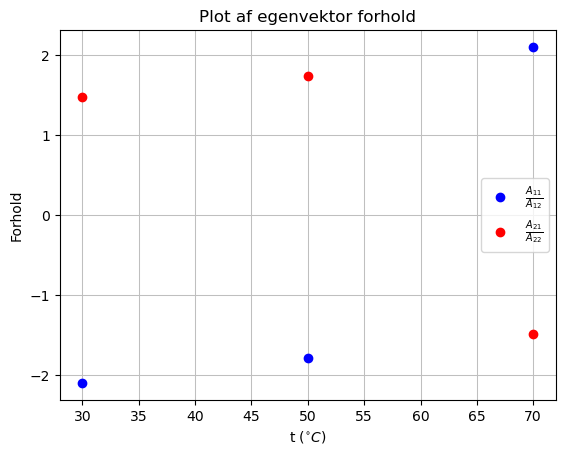

In [245]:
x = [30, 50, 70]
y1 = [A301, A501, A701]
y2 = [A302, A502, A702]
plt1 = dtuplot.scatter(x, y1, ylabel='Forhold', xlabel='t $(^{\circ}C)$', title='Plot af egenvektor forhold', rendering_kw={'color': 'blue'}, show=False)
plt2 = dtuplot.scatter(x, y2, ylabel='Forhold', xlabel='t $(^{\circ}C)$', title='Plot af egenvektor forhold', rendering_kw={'color': 'red'}, show=False)
comb = plt1 + plt2
comb.ax.legend(labels=['$\\frac{A_{11}}{A_{12}}$', '$\\frac{A_{21}}{A_{22}}$'])

5.1

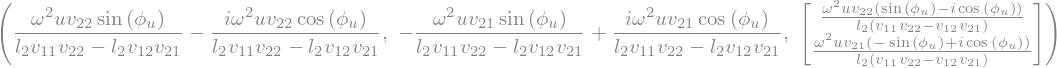

In [246]:
v11, v12, v21, v22 = symbols('v_11 v_12 v_21 v_22')
s1, s2 = symbols('s_1 s_2')
V = Matrix([[v11, v12], [v21, v22]])
S = Matrix([s1, s2])
s_sol = solve(Eq(V*S, f_til), [s1, s2])
s1_iso, s2_iso = list(s_sol.values())
S_sol = Matrix([s1_iso.simplify(), s2_iso.simplify()])
s1_iso, s2_iso, S_sol

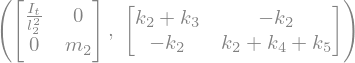

In [247]:
M, K_til

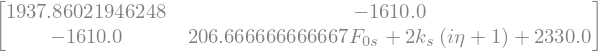

In [248]:
K_til.subs({k3: kk3, k4: kb2, k5: 2*kk}).subs(mydict)

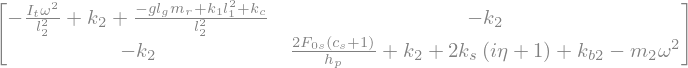

In [249]:
Am = (K_til - w**2 * M).subs({k3: kk3, k4: kb2, k5: 2*kk})
Am

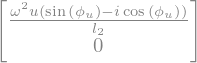

In [250]:
f_til

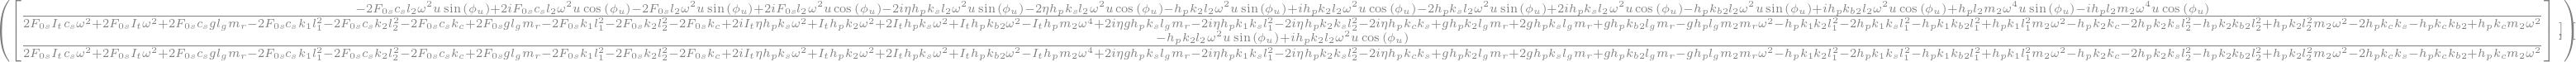

In [257]:
z_til = Am.gauss_jordan_solve(f_til)
z_til

In [258]:
zp30, zp50, zp70 = z_til[0].subs(mydict).subs(v30), z_til[0].subs(mydict).subs(v50), z_til[0].subs(mydict).subs(v70)

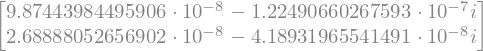

In [259]:
N(zp30.evalf(4).subs(w,2))

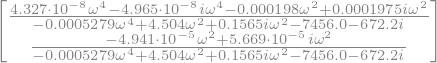

In [260]:
zp50.evalf(4)

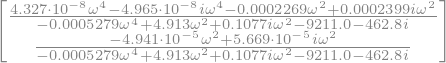

In [261]:
zp70.evalf(4)

In [262]:
Ap = sqrt(re(zp30[0])**2 + im(zp30[0])**2), sqrt(re(zp30[1])**2 + im(zp30[1])**2), sqrt(re(zp50[0])**2 + im(zp50[0])**2), sqrt(re(zp50[1])**2 + im(zp50[1])**2), sqrt(re(zp70[0])**2 + im(zp70[0])**2), sqrt(re(zp70[1])**2 + im(zp70[1])**2)
phip = arg(zp30[0]), arg(zp30[1]), arg(zp50[0]), arg(zp50[1]), arg(zp70[0]), arg(zp70[1])

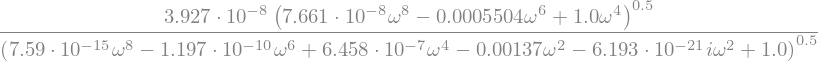

In [263]:
abs(zp30[0]).evalf(4)

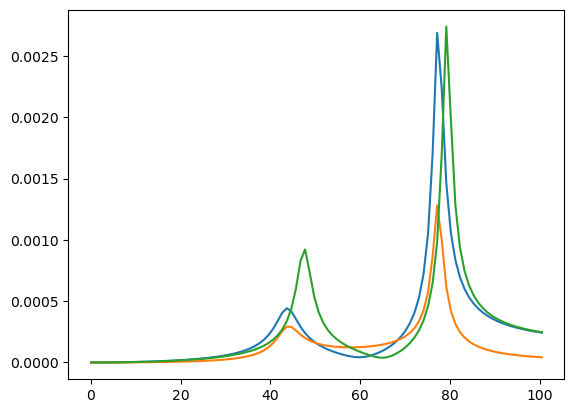

In [268]:
import matplotlib.pyplot as plt
import numpy as np

om = np.linspace(0, 32*np.pi, 100)
aplam1 = lambdify(w, Ap[0], 'numpy')
aplam2 = lambdify(w, Ap[1], 'numpy')
aplam3 = lambdify(w, Ap[2], 'numpy')

plt.plot(om, aplam1(om), label='$A_{p1}$')
plt.plot(om, aplam2(om), label='$A_{p2}$')
plt.plot(om, aplam3(om), label='$A_{p3}$')
plt.show()

In [269]:
yppp = [sqrt(re(funky)**2 + im(funky)**2) * cos(w*t + arg(funky)) for funky in [zp30[0], zp30[1], zp50[0], zp50[1], zp70[0], zp70[1]]]

In [270]:
yp301 = yppp[0]
yp302 = yppp[1]
yp501 = yppp[2]
yp502 = yppp[3]
yp701 = yppp[4]
yp702 = yppp[5]

In [327]:
plotty = [yp301, yp501, yp701, yp302, yp502, yp702]
plottyw = [[plotty[i].subs(w, w_).evalf(1) for i in range(6)] for w_ in [6*2*pi, 8*2*pi, 9*2*pi, 10*2*pi]]

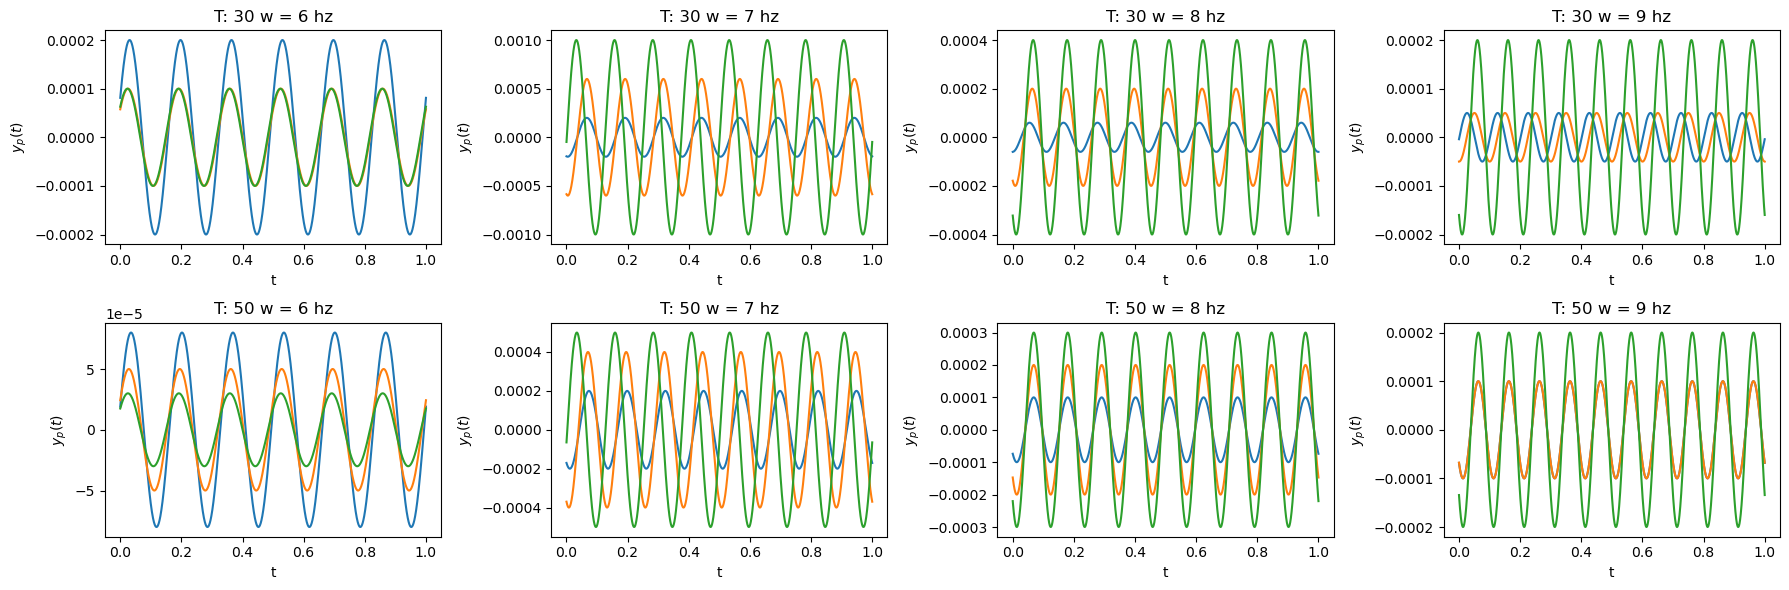

In [329]:
import matplotlib.pyplot as plt
import numpy as np

t_ = np.linspace(0, 1, 10000)
arr_np = lambdify(t, plottyw, 'numpy')

# make a 3x4 grid of subplots
fig, ax = plt.subplots(2, 4, figsize=(18, 6))
deg = [30, 50, 70]

# loop over the subplots
for i in range(2):
    for j in range(4):
        # plot the data
        ax[i, j].plot(t_, arr_np(t_)[j][3*i], t_, arr_np(t_)[j][3*i+1], t_, arr_np(t_)[j][3*i+2])
        ax[i, j].set_xlabel('t')
        ax[i, j].set_ylabel('$y_p(t)$')
        ax[i, j].set_title(f'T: {str(deg[i])} w = {str(6+j)} hz')
        
plt.tight_layout()